In [1]:
%matplotlib inline
import math
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm
from pandas import ExcelWriter
import pickle
import scipy as sp
from sklearn.metrics import plot_confusion_matrix

In [2]:
def load_object(filename):
    with open(filename, 'rb') as fid:
        file = pickle.load(fid)
    return file

In [3]:
#load the codes
Qian2016codes = load_object('models/revision_3/Qian2016codes_4.pkl')
Qian2018codes = load_object('models/revision_3/Qian2018codes_4.pkl')
QianU2019codes = load_object('models/revision_3/QianU2019codes_4.pkl')
QianR2019codes = load_object('models/revision_3/QianR2019codes_4.pkl')
Sourcecodes = load_object('models/revision_3/Sourcecodes_4.pkl')
Sourcetrainingcodes = load_object('models/revision_3/Sourcesamples_trainingcodes_4.pkl')
Sourcetestingcodes = load_object('models/revision_3/Sourcesamples_testingcodes_4.pkl')

#Load the DFs
Qian2016DF, Qian2016prob, Qian2016keys = load_object('models/revision_3/Qian2016DF_4.pkl')
Qian2018DF, Qian2018prob, Qian2018keys = load_object('models/revision_3/Qian2018DF_4.pkl')
QianU2019DF, QianU2019prob, QianU2019keys = load_object('models/revision_3/QianU2019DF_4.pkl')
QianR2019DF, QianR2019prob, QianR2019keys = load_object('models/revision_3/QianR2019DF_4.pkl')
SourceDF, Sourceprob, Sourcekeys = load_object('models/revision_3/SourceDF_4.pkl')
SourcetrainingDF, Sourcetrainingprob, Sourcekeys = load_object('models/revision_3/SourcetrainingDF_4.pkl')
SourcetestingDF, Sourcetestingprob, Sourcekeys = load_object('models/revision_3/SourcetestingDF_4.pkl')

clustersdata = [Qian2016DF, Qian2018DF, QianU2019DF, QianR2019DF, SourceDF]
probdata = [Qian2016prob, Qian2018prob, QianU2019prob, QianR2019prob, Sourceprob]
airkeys = [Qian2016keys, Qian2018keys, QianU2019keys, QianR2019keys, Sourcekeys]

In [4]:
Train = SourcetrainingDF.iloc[:,:-3]
TrainLabels = SourcetrainingDF['labels']
Test = SourcetestingDF.iloc[:,:-3]
TestLabels = SourcetestingDF['labels']

Train_codes = Sourcetrainingcodes
Test_codes = Sourcetestingcodes

Train_prob = Sourcetrainingprob
Test_prob = Sourcetestingprob

In [28]:
mixedTrainDF = pd.concat([Train, TrainLabels], axis = 1).sample(frac = 1, random_state = 1).reset_index(drop = True)
mixedTrain = mixedTrainDF.iloc[:,:-1]
mixedTrainLabels = mixedTrainDF.iloc[:,-1]

mixedTraincodes = pd.DataFrame(Train_codes).sample(frac = 1, random_state = 1).reset_index(drop = True)
mixedTrainprob = pd.DataFrame(Train_prob).sample(frac = 1, random_state = 1).reset_index(drop = True)

In [43]:
TrainLabels[TrainLabels.isin(['Soil dust', 'Construction dust', 'Construction sand'])] = "Soil and Construction"

<ipython-input-43-7b48f2f16dd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainLabels[TrainLabels.isin(['Soil dust', 'Construction dust', 'Construction sand'])] = "Soil and Construction"


In [6]:
TestLabels[TestLabels.isin(['Soil dust', 'Construction dust', 'Construction sand'])] = "Soil and Construction"

<ipython-input-6-3c7d48216f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestLabels[TestLabels.isin(['Soil dust', 'Construction dust', 'Construction sand'])] = "Soil and Construction"


In [33]:
# sample new soil and construction
addintrain = SourcetrainingDF[SourcetrainingDF['labels'] == 'Soil and Construction'].sample(n = len(SourcetrainingDF[SourcetrainingDF['labels'] == 'Coal burning']))
addintest = SourcetestingDF[SourcetestingDF['labels'] == 'Soil and Construction'].sample(n = len(SourcetestingDF[SourcetestingDF['labels'] == 'Coal burning']))

In [34]:
newSourcetrainingDF = pd.concat([addintrain, SourcetrainingDF[~SourcetrainingDF['labels'].isin(['Soil and Construction'])]])
newSourcetestingDF = pd.concat([addintest, SourcetestingDF[~SourcetestingDF['labels'].isin(['Soil and Construction'])]])

# Logistic Regression

## Raw Data

In [5]:
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.linear_model import LogisticRegression



#clf = LogisticRegression().fit(Train, TrainLabels)

In [79]:
clf.score(Test, TestLabels)

0.2

In [80]:
clf.score(Train, TrainLabels)

0.2

In [29]:
score = cross_val_score(LogisticRegression(), Train, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.19989281886387997, 0.0]


In [30]:
score = cross_val_score(LogisticRegression(), mixedTrain, mixedTrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.19989281886387997, 0.0]


## Codes

In [81]:
clf = LogisticRegression().fit(Train_codes, TrainLabels)

print([clf.score(Test_codes, TestLabels), clf.score(Train_codes, TrainLabels)])

[0.49036402569593146, 0.5281886387995712]


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


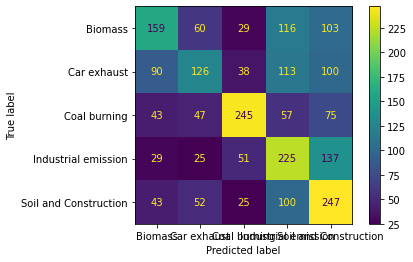

In [85]:
plot_confusion_matrix(clf, Test_prob, TestLabels)

In [12]:
score = cross_val_score(LogisticRegression(), Train_codes, TrainLabels, cv = 5)
print([score.mean(), score.std()])

C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[0.4887459807073955, 0.010313922163960878]


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
score = cross_val_score(LogisticRegression(), mixedTraincodes, mixedTrainLabels, cv = 5)
print([score.mean(), score.std()])

C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[0.482422293676313, 0.01025472008562914]


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## LDA

In [13]:
clf = LogisticRegression().fit(Train_prob, TrainLabels)

print([clf.score(Test_prob, TestLabels), clf.score(Train_prob, TrainLabels)])

[0.4291220556745182, 0.43386923901393354]


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
score = cross_val_score(LogisticRegression(), Train_prob, TrainLabels, cv = 5)
print([score.mean(), score.std()])

C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[0.4235798499464094, 0.013720022750439022]


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Neural Network

## Raw Data

In [6]:
from sklearn.neural_network import MLPClassifier

#clf = MLPClassifier().fit(Train, TrainLabels)

In [88]:
clf.score(Test, TestLabels)

0.2

In [89]:
clf.score(Train, TrainLabels)

0.2

In [20]:
score = cross_val_score(MLPClassifier(), Train, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.20010718113612005, 0.00026253909354588095]


## Codes

In [51]:
clf = MLPClassifier().fit(Train_codes, TrainLabels)

print([clf.score(Test_codes, TestLabels), clf.score(Train_codes, TrainLabels)])

[0.6269807280513918, 0.6883172561629153]


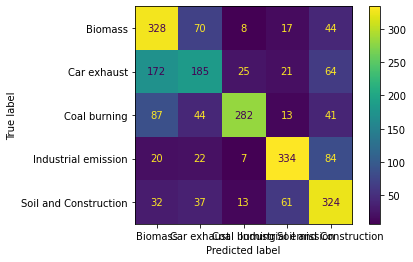

In [8]:
plot_confusion_matrix(clf, Test_codes, TestLabels)

In [21]:
score = cross_val_score(MLPClassifier(), Train_codes, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.6161843515541265, 0.006132784351948543]


In [33]:
score = cross_val_score(MLPClassifier(), mixedTraincodes, mixedTrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.6165058949624866, 0.008717984740691423]


## LDA

In [92]:
clf = MLPClassifier().fit(Train_prob, TrainLabels)

print([clf.score(Test_prob, TestLabels), clf.score(Train_prob, TrainLabels)])

[0.5203426124197003, 0.5406216505894963]


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


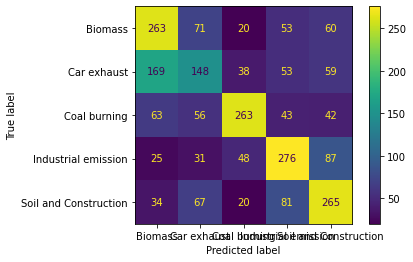

In [94]:
plot_confusion_matrix(clf, Test_prob, TestLabels)

In [22]:
score = cross_val_score(MLPClassifier(), Train_prob, TrainLabels, cv = 5)
print([score.mean(), score.std()])

C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

[0.5204715969989282, 0.008570470654535391]


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# k nearest neighbors

## Raw Data

In [35]:
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors = 30, weights = 'distance').fit(Train, TrainLabels)

In [37]:
clf1.score(Test, TestLabels)

0.6355460385438972

In [97]:
clf.score(Train, TrainLabels)

1.0

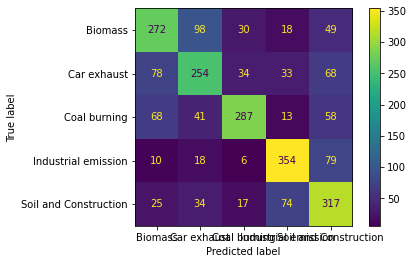

In [22]:
plot_confusion_matrix(clf, Test, TestLabels)

In [36]:
score = cross_val_score(KNeighborsClassifier(n_neighbors = 30, weights = 'distance'), Train, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.614898177920686, 0.00738383907809208]


## Codes

In [98]:
clf = KNeighborsClassifier(n_neighbors = 30, weights = 'distance').fit(Train_codes, TrainLabels)

print(clf.score(Test_codes, TestLabels))

0.563169164882227


In [100]:
clf.score(Train_codes, TrainLabels)

1.0

In [37]:
score = cross_val_score(KNeighborsClassifier(n_neighbors = 30, weights = 'distance'), Train_codes, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.6018220793140407, 0.004647263320188364]


## LDA

In [101]:
clf = KNeighborsClassifier(n_neighbors = 30, weights = 'distance').fit(Train_prob, TrainLabels)

print(clf.score(Test_prob, TestLabels))

0.540899357601713


In [39]:
score = cross_val_score(KNeighborsClassifier(n_neighbors = 30, weights = 'distance'), Train_prob, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.5655948553054662, 0.005973365398967965]


# Random Forest

## Raw Data

In [41]:
from sklearn.ensemble import RandomForestClassifier

#clf = RandomForestClassifier().fit(Train, TrainLabels)

In [103]:
clf.score(Test, TestLabels)

0.2

In [104]:
clf.score(Train, TrainLabels)

0.2

In [42]:
score = cross_val_score(RandomForestClassifier(), Train, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.19989281886387997, 0.0]


## Codes

In [105]:
clf = RandomForestClassifier().fit(Train_codes, TrainLabels)

print([clf.score(Test_codes, TestLabels), clf.score(Train_codes, TrainLabels)])

[0.5468950749464668, 0.9996784565916399]


In [43]:
score = cross_val_score(RandomForestClassifier(), Train_codes, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.5876741693461951, 0.004159401481657521]


## LDA

In [106]:
clf = RandomForestClassifier().fit(Train_prob, TrainLabels)

print([clf.score(Test_prob, TestLabels), clf.score(Train_prob, TrainLabels)])

[0.49593147751606, 0.9983922829581994]


In [48]:
score = cross_val_score(RandomForestClassifier(), Train_prob, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.5369774919614148, 0.0062035567539068465]


# Gradient Boosted Tree

## Raw Data

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

#clf = GradientBoostingClassifier().fit(Train, TrainLabels)

In [108]:
clf.score(Test, TestLabels)

0.2

In [109]:
clf.score(Train, TrainLabels)

0.2

In [47]:
score = cross_val_score(GradientBoostingClassifier(), Train, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.19989281886387997, 0.0]


## Codes

In [25]:
clf = GradientBoostingClassifier().fit(Train_codes, TrainLabels)

print([clf.score(Test_codes, TestLabels), clf.score(Train_codes, TrainLabels)])

[0.6154175588865096, 0.6806002143622722]


In [46]:
score = cross_val_score(GradientBoostingClassifier(), Train_codes, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.6107181136120043, 0.0045041589259272475]


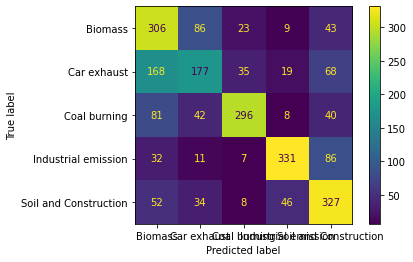

In [26]:
plot_confusion_matrix(clf, Test_codes, TestLabels)

## LDA

In [111]:
clf = GradientBoostingClassifier().fit(Train_prob, TrainLabels)

print([clf.score(Test_prob, TestLabels), clf.score(Train_prob, TrainLabels)])

[0.558458244111349, 0.6337620578778135]


In [49]:
score = cross_val_score(GradientBoostingClassifier(), Train_prob, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.5640943193997856, 0.0038136006162180383]


# Support Vector machine

## Raw Data

In [52]:
from sklearn.svm import SVC

#clf = SVC().fit(Train, TrainLabels)

In [113]:
clf.score(Test, TestLabels)

0.4197002141327623

In [114]:
clf.score(Train, TrainLabels)

0.41479099678456594

In [53]:
score = cross_val_score(SVC(), Train, TrainLabels, cv = 5)
print([score.mean(), score.std()])

[0.39410503751339765, 0.019150962722012246]


## Codes

In [118]:
clf = SVC().fit(Train_codes, TrainLabels)

print([clf.score(Test_codes, TestLabels), clf.score(Train_codes, TrainLabels)])

[0.2809421841541756, 0.2956055734190782]


In [ ]:
score = cross_val_score(SVC(), Train_codes, TrainLabels, cv = 5)
print([score.mean(), score.std()])

## LDA

In [117]:
clf = SVC().fit(Train_prob, TrainLabels)

print([clf.score(Test_prob, TestLabels), clf.score(Train_prob, TrainLabels)])

[0.4980728051391863, 0.5087888531618435]


In [ ]:
score = cross_val_score(SVC(), Train_prob, TrainLabels, cv = 5)
print([score.mean(), score.std()])

# Fit various models with samples

In [17]:
def model_predict(dataset, model, keys):
    Results = model.predict(dataset.iloc[:,:-3])

    Labels = dataset['labels']

    modellist = []
    #for every sample number
    for i in dataset['labels'].unique():
        modellist.append([i, np.unique(np.array(Results[dataset['labels'] == i]), return_counts = True)])

    number = np.arange(0, 13, 1)
    fig = plt.figure(figsize = (12,6), dpi = 300)
    for i, label in enumerate(keys):
        ax = fig.add_subplot(3, 5, i+1)
        ax.pie(modellist[i][1][1]/modellist[i][1][1].sum(), labels = modellist[i][1][0], textprops={'fontsize': 5})
        ax.text(0.5, 0.95, label, transform=ax.transAxes,
                fontsize=5, fontweight='bold', va='top')
    return modellist

def model_predict_codes(dataset, codes, model, keys):
    Results = model.predict(codes)

    Labels = dataset['labels']

    modellist = []
    #for every sample number
    for i in dataset['labels'].unique():
        modellist.append([i, np.unique(np.array(Results[dataset['labels'] == i]), return_counts = True)])

    number = np.arange(0, 13, 1)
    fig = plt.figure(figsize = (12,6), dpi = 300)
    for i, label in enumerate(keys):
        ax = fig.add_subplot(3, 5, i+1)
        ax.pie(modellist[i][1][1]/modellist[i][1][1].sum(), labels = modellist[i][1][0], textprops={'fontsize': 5})
        ax.text(0.5, 0.95, label, transform=ax.transAxes,
                fontsize=5, fontweight='bold', va='top')
    return modellist

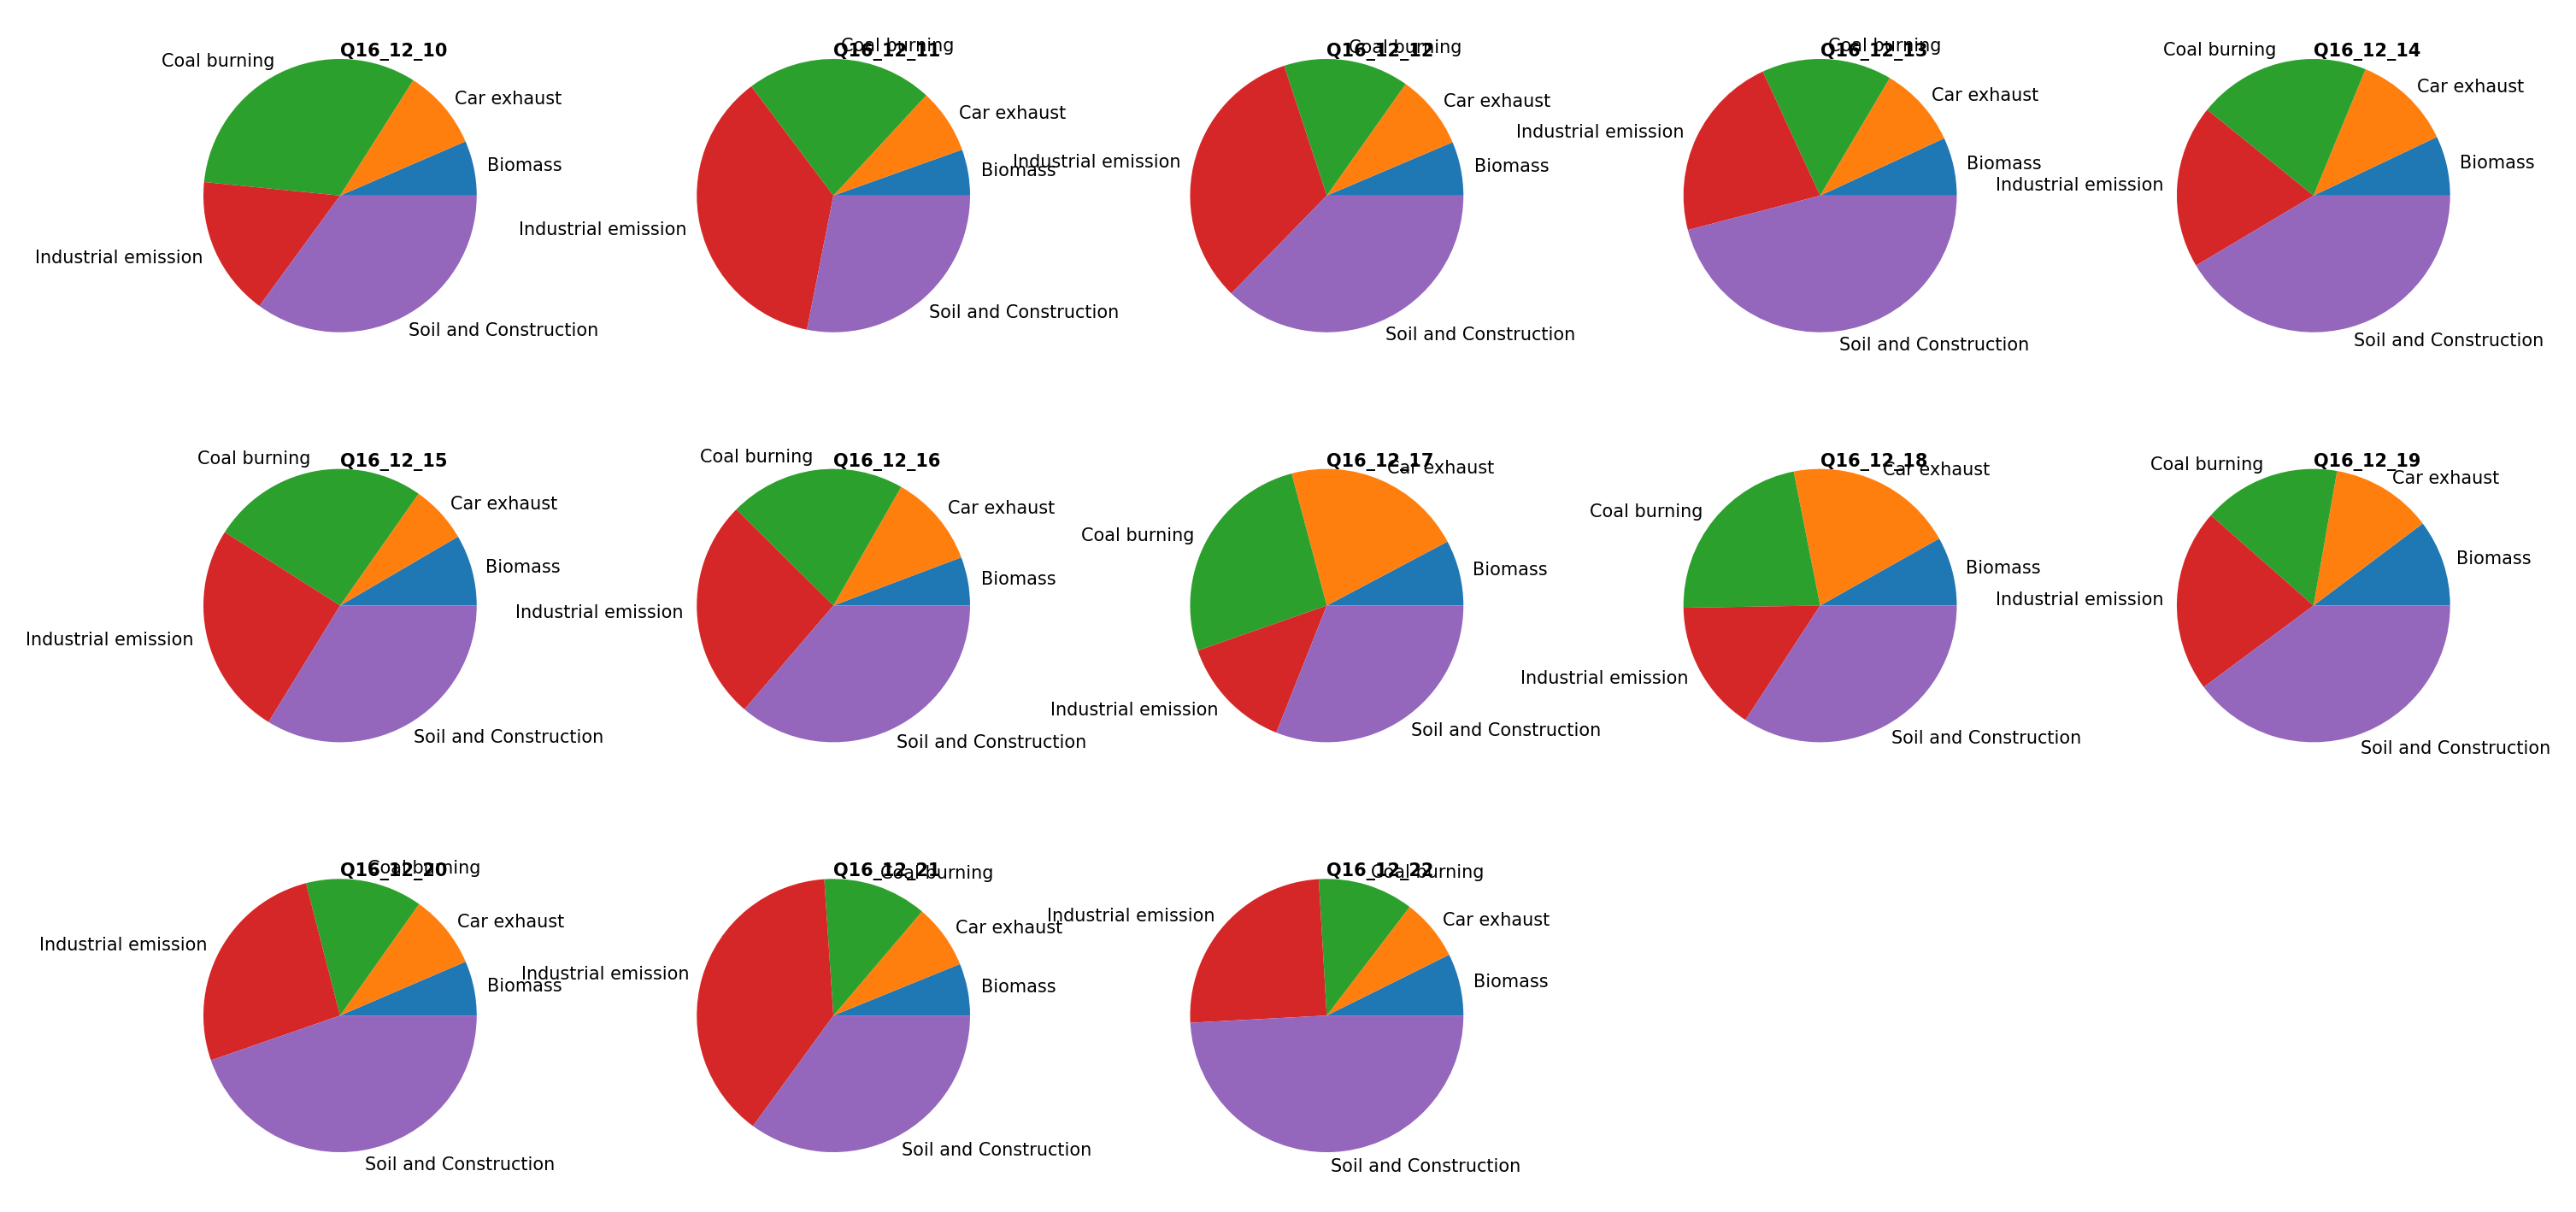

In [28]:
modellist = model_predict_codes(Qian2016DF, Qian2016codes, clf, Qian2016keys)

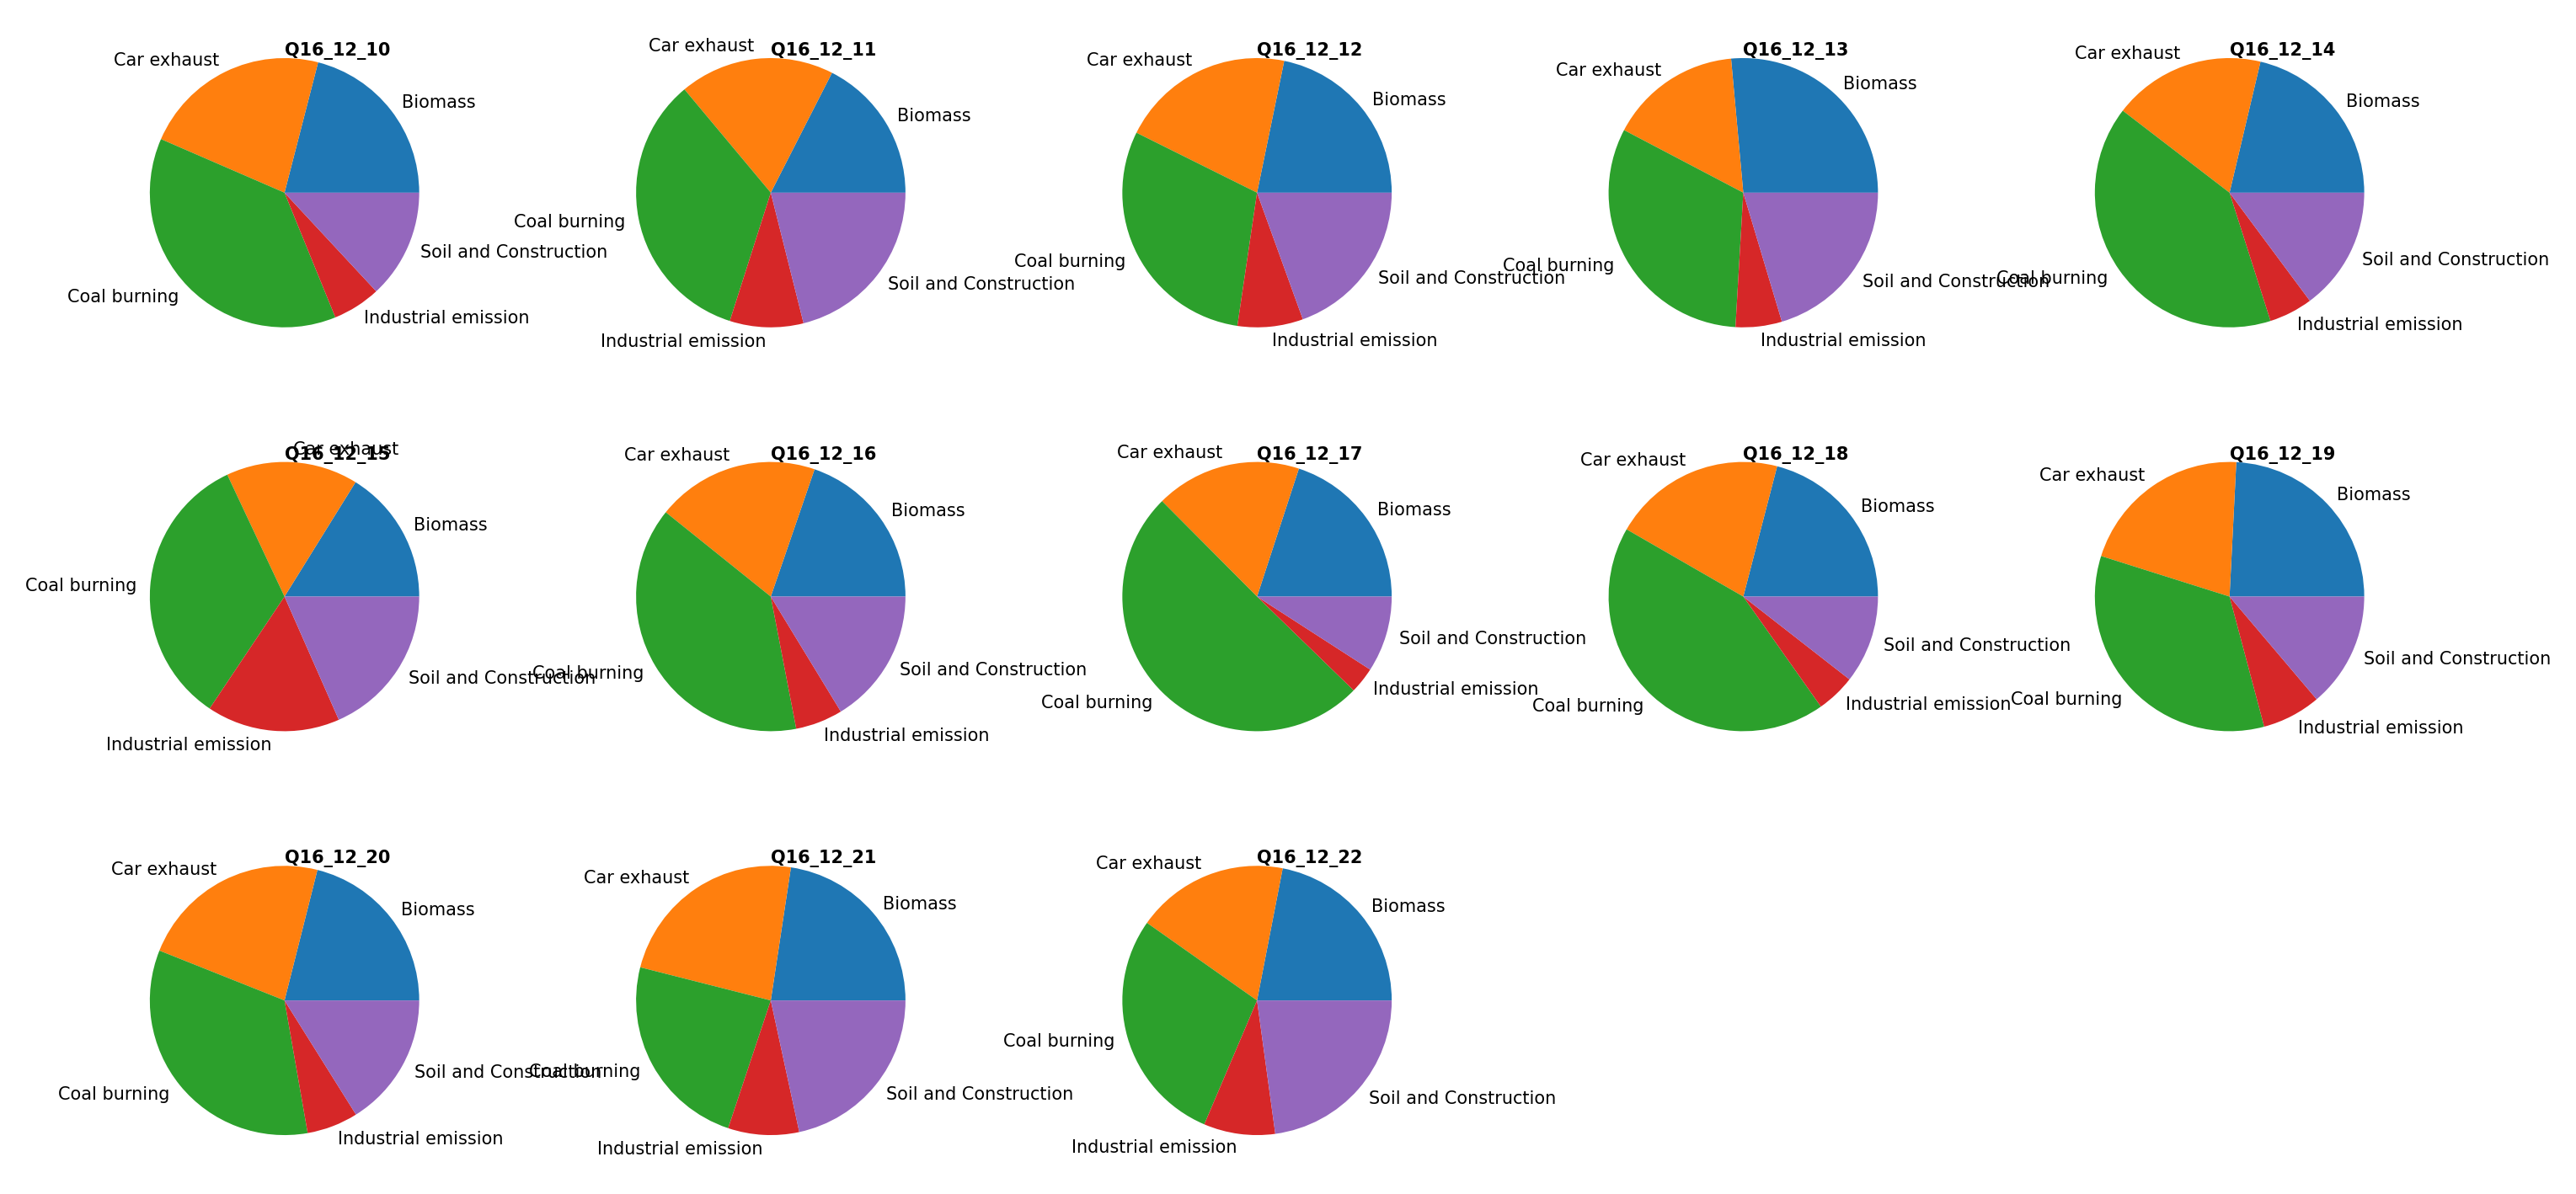

In [38]:
modellist1 = model_predict(Qian2016DF, clf1, Qian2016keys)

In [41]:
coalburninglist = []
normalize = modellist[0][1][1][2]/ modellist[0][1][1].sum()
for i in modellist:
    coalburninglist.append(((i[1][1][2]/ i[1][1].sum())/normalize) * 100)

In [42]:
coalburninglist

[100.0,
 68.32447261163614,
 45.790496638901566,
 47.50198711512717,
 62.95600146700793,
 79.36185654699482,
 64.2920532541748,
 80.86067025323798,
 68.33848461245256,
 50.234659568506586,
 42.64415292148091,
 37.92993637191054,
 34.88100075781704]

In [43]:
coalburninglist1 = []
normalize = modellist1[0][1][1][2]/ modellist1[0][1][1].sum()
for i in modellist1:
    coalburninglist1.append(((i[1][1][2]/ i[1][1].sum())/normalize) * 100)

In [44]:
coalburninglist1

[100.0,
 90.26066606313924,
 79.66936327130752,
 84.32440090673575,
 107.0940662836586,
 89.26679564180658,
 102.98655467622831,
 133.447132138796,
 114.39231421627669,
 90.27179479455356,
 89.68068030261898,
 63.26368570902597,
 75.30562036831489]

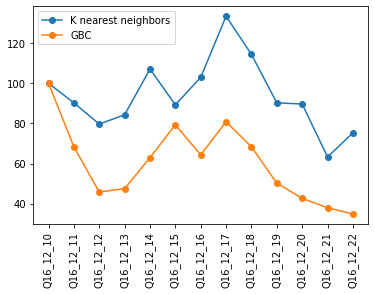

In [50]:
plt.plot(Qian2016keys,  coalburninglist1, 'o-', label = 'K nearest neighbors')
plt.plot(Qian2016keys,  coalburninglist, 'o-', label = 'GBC')
plt.xticks(rotation = 90)
plt.legend()
plt.show()